# ML Classification dataset: Congressional Voting Records

Use the voting records of congressmen and labels of their Party affiliation to build a model to predict what party they belong to

In [1]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header_list = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration',
       'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports',
       'eaa_rsa']

In [3]:
# Get the data and put into a dataframe
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv', names=header_list)

In [4]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
# "Replace '?' with 0 and n with 0 and y with 1
df.replace({'?':0,'n':0,'y':1,'democrat':0,'republican':1}, inplace=True)

# Simple EDA 

In [6]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   party              435 non-null    int64
 1   infants            435 non-null    int64
 2   water              435 non-null    int64
 3   budget             435 non-null    int64
 4   physician          435 non-null    int64
 5   salvador           435 non-null    int64
 6   religious          435 non-null    int64
 7   satellite          435 non-null    int64
 8   aid                435 non-null    int64
 9   missile            435 non-null    int64
 10  immigration        435 non-null    int64
 11  synfuels           435 non-null    int64
 12  education          435 non-null    int64
 13  superfund          435 non-null    int64
 14  crime              435 non-null    int64
 15  duty_free_exports  435 non-null    int64
 16  eaa_rsa            435 non-null    int64
dtypes: int64(17)
mem

In [8]:
df_desc = df.describe()

In [11]:
df_desc

,stat,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
1,mean,0.386207,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
2,std,0.487440,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
3,min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
6,75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
col_list = header_list[1:]

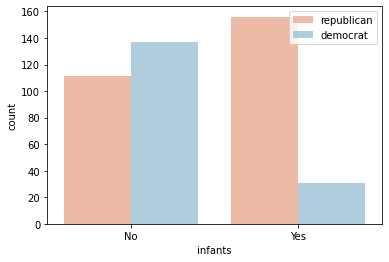

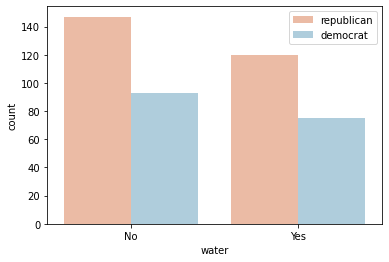

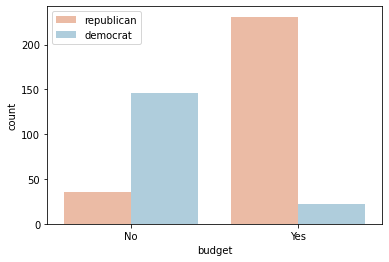

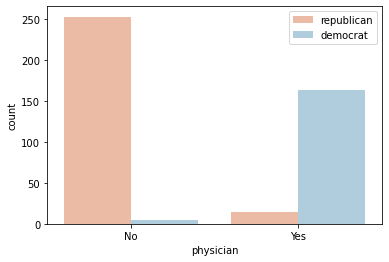

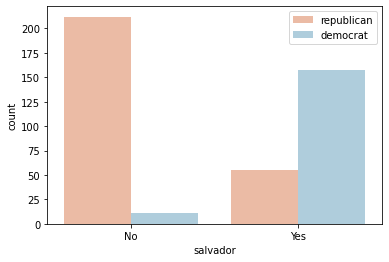

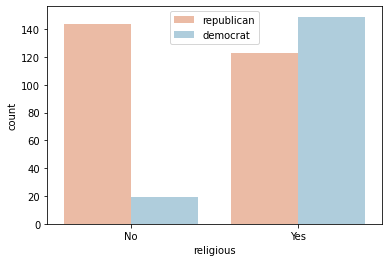

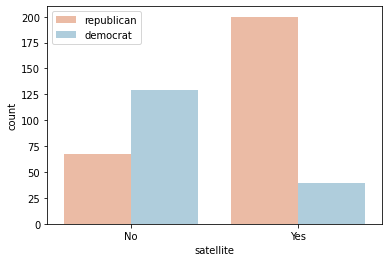

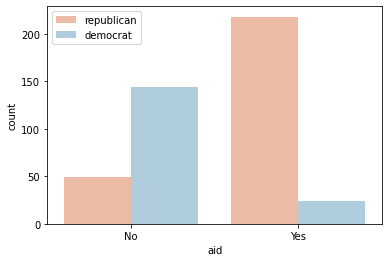

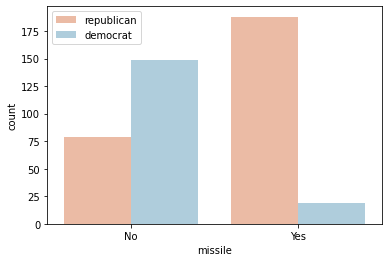

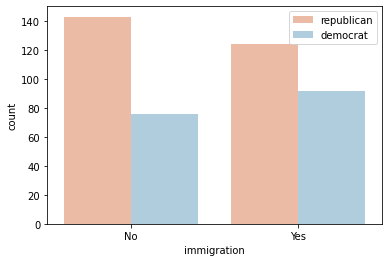

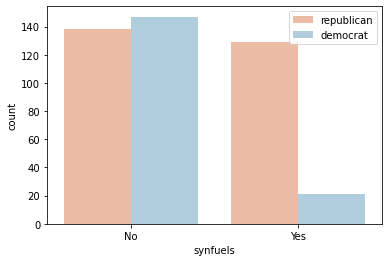

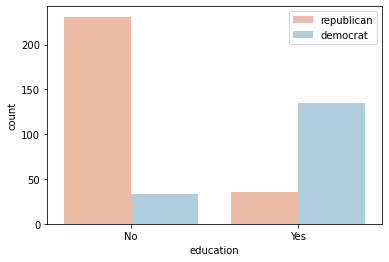

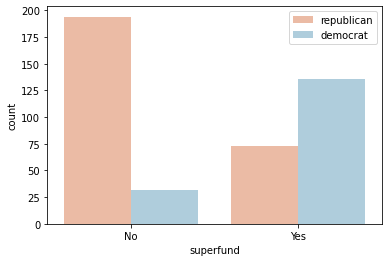

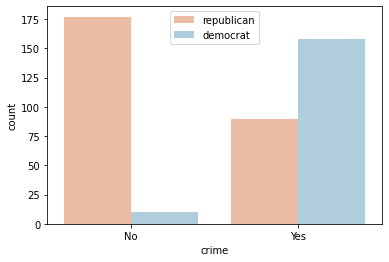

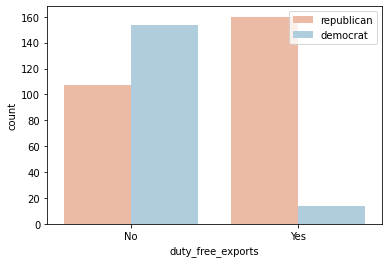

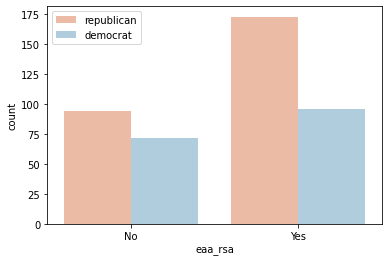

In [39]:
for col in col_list:
    plt.figure()
    sns.countplot(x=col , hue='party', data=df, palette='RdBu')
    plt.xticks([0,1],['No','Yes'])
    plt.legend(['republican','democrat'])

# k-Nearest Neighbors: Fit
We will fit a k-Nearest Neighbors classifier to the voting dataset with a k-NN classifier with 6 neighbors and fit it to the dat

In [40]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [70]:
# Predict the labels for the training data X
y_pred = knn.predict(X)


# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print(f"Prediction: {new_prediction}")

Prediction: [1]


In [67]:
# Create a bogus record to get a predicX_new = X[1].reshape(1,-1)

In [68]:
type(X_new)

numpy.ndarray

In [69]:
X_new

array([[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]], dtype=int64)